# MNIST digit classification using ANNs in Keras

Following on from the digit classification using Scikit Learn we now do the same with a ANN built using the Keras library. 

The steps below are adapted from the [Keras MNIST example](https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py). If you have time explore the other examples in their repository - in particular the example showing how to classify the MNIST data using Convolutional Neural Networks. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, datasets, utils, optimizers
import seaborn as sns
%matplotlib inline

In [2]:
# set parameters 
batch_size = 128
num_classes = 10
epochs = 20

### Data Exploration

The MNIST data can be downloaded using the following Keras method: 

In [3]:
# get MNIST data
## Alternative get mnist_784 set from https://www.openml.org/d/554
# downloads data https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz (11Mb)
mnist = datasets.mnist.load_data()

This is the full 70k dataset with 28x28 images already split into a 60k/10k training sample: 

In [4]:
# pre-split 60k vs 10k 
(x_train, y_train), (x_test, y_test) = mnist

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape, type(x_train)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,), numpy.ndarray)

As before we can take one of the images and plot using matplotlib and a heatmap: 

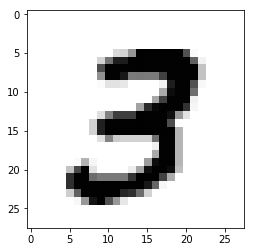

In [6]:
plt.imshow(x_train[7], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

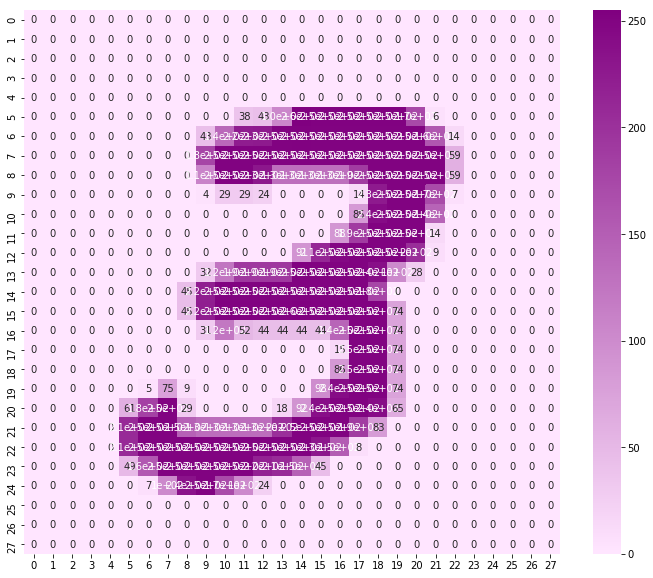

In [11]:
# round down intensity values for cleaner plot 
#digit = x_train[7] / 255
digit = x_train[7]
digit[digit < 0.01] = 0
digit = np.around(digit, decimals=1)

plt.figure(figsize=(12,10))
my_cmap = sns.light_palette("Purple", as_cmap=True)
ax = plt.subplot()
sns.heatmap(digit, annot=True, ax=ax, cmap=my_cmap)
plt.show()

### Data Preprocessing

Before the data is ready to be used by an ANN it must first be flattened and converted to `float32` type. All elements are divided through to give a range of values from 0 to 1:

In [ ]:
# flatten into 784 
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# change to float 32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# divide through by 255 to scale
x_train /= 255
x_test /= 255

The target values are converted in categorial variables: 

In [ ]:
# convert class vectors to binary class matrices
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

This then changes the target value from one value to a (1,10) array. (e.g. 3 now becomes (0,0,0,3,0,0,0,0,0,0,0))

In [ ]:
# widens 60k 1 into 10 element array
y_train.shape

### Network construction 

To create a dense network in Keras you first choose the type of model (sequential in our case) and then add successive layers:

In [ ]:
# construct network
## 784 input layer x 2 x 512 hidden x 10 output
## 669k training parameters 
## TODO - Dropout? 
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Not that the input shape is given as a parameter to the first hidden layer and that different activation functions are chosen for the hidden and output layers. Dropout is applied to avoid overfitting (more details [here](https://keras.io/layers/core/).

You can see over 669,000 parameters need to be trained! 

Once constructed the network is then compiled with a choice of loss function, optimiser and choice of performance evaluation (accuracy):

In [ ]:
model.compile(loss='categorical_crossentropy',
               optimizer=optimizers.Adam(),
               metrics=['accuracy'])

The fit can now be run with the test data provided as validation: 

In [ ]:
%%time 

# fit the model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

This should take 4-5 minutes to run but you will see the changes in the loss value and accuracy with each epoch to give you a good idea of convergence. 

Running the test data through the trained network is much faster: 

In [ ]:
## see 98% accuracy from training, what about testing? b
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In my run I saw **98%** accuracy - not bad! 